#Actividad 
# Momento de Retroalimentación: Módulo 2 Implementacion de un modelo de Deep Learning (Portafolio Implementcion)

Fecha Inicio del Trabajo:  27/08/2022


Fecha de Finalizado: 11/02/2022 (primera entrega)


Nombre: Roberto Valdez

Matricula: A01746863

Instrucciones:


Implementación de un modelo de deep learning.

1. Crea un repositorio de github para este proyecto.


2.  Selecciona un problema y consigue un dataset para resolver dicho problema. 

3.  Implementa una arquitectura de deep learning para solucionar el problema. Lo que se busca es que apliques correcta y efectivamente las técnicas vistas en el módulo.

4.  Analiza los resultados de tu modelo set de pruebas y validación. 

5.  Mejora tu modelo usando técnicas de regularización, ajustando hiper parámetros, modificando la arquitectura de tu modelo o buscando otro modelo. 

6.  Documenta y explica cuáles son los cambios que funcionaron y por qué funcionaron. 

7.  Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.

8.  Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.




## Problema Selecionado: procesamiento y clasificacion de imagenes



In [3]:
# Librerias
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras 
from keras import layers
%matplotlib inline

# Librerias de conexion:
from google.colab import drive
from google.colab import files

# Tensorflow <2.10 use
from tensorflow.keras.preprocessing import image_dataset_from_directory
# Tensroflow >2.10 use
# from tensorflow.keras.utils import image_dataset_from_directory

In [4]:
# revision de la version de tensorflow
print(tf.__version__) # 2.9.2

2.9.2


In [5]:
# Conexion con drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Data"
%ls

Mounted at /content/drive
/content/drive/MyDrive/Data
Alcohol_Sales.csv                             IMDB-Movie-Data.csv
Animals.csv                                   iris.data
annotations/                                  iris.names
annotations.tar.gz                            kaggle.json
archive/                                      my_figure.png
Automobile.csv                                oxford_segmentation.keras
bodyfat.csv                                   purchases.csv
cars-vs-bikes.log                             purchases.json
convnet_from_scratch/                         sampleSubmission.csv
convnet_from_scratch_with_augmentation/       test1.zip
convnet_from_scratch_with_augmentation.keras  titanic.csv
digits/                                       train_images/
dogs-vs-cats.zip                              train.zip
images.tar.gz                                 weatherHistory.csv


# Seleccion de Dataset

Ahora bien, ya teniendo la conexion con google drive, en kaggle buscamos un dataset de imagenes que nos apoye en clasificar  para luego procesar las imagenes dentro del dataset selecionado.

En este caso selecionamos un dataset usando en clase de identificacion de vehiculos, especialmente carros y motocicletas, la cual contiene  un conjunto de entrenamiento con imágenes de  uno  o mas vehiculos en una sola foto sin labels automaticos. Cada imagen tiene un nombre de archivo que es su identificación única. El conjunto de datos se comprende aproximadamente una cantidad de +800 imagenes entre  ambos tipos de vehiculos.

Nota:

Este dataset no esta dentro de las competencias activas de kaggle hasta el momento (1/11/2022), donde se puede encontrar este dataset es en el siguiente link:

https://www.kaggle.com/datasets/devkhant24/cars-and-bikes-prediction

 Ya descargado , extraemos el el zip del dataset y set de entrenamiento

La estructura de los folders es la siguiente:


```
archive/
...Bikes/
......train/              
...Cars/
......train/         
```




Teniendo en cuenta lo anterior, las imagenes seran extraidas de la carpeta de train para la creacion de los nuevos sets:

* train
* test
* validation

los cuales tendran la siguiente estructura:
```
train_images/
...train/
......Bikes/
......Cars/              
...test/
......Bikes/
......Cars/   
...validation/
......Bikes/
......Cars/       
```



In [6]:
# Checamos si  esta presente en el drive 
%ls

Alcohol_Sales.csv                             IMDB-Movie-Data.csv
Animals.csv                                   iris.data
annotations/                                  iris.names
annotations.tar.gz                            kaggle.json
archive/                                      my_figure.png
Automobile.csv                                oxford_segmentation.keras
bodyfat.csv                                   purchases.csv
cars-vs-bikes.log                             purchases.json
convnet_from_scratch/                         sampleSubmission.csv
convnet_from_scratch_with_augmentation/       test1.zip
convnet_from_scratch_with_augmentation.keras  titanic.csv
digits/                                       train_images/
dogs-vs-cats.zip                              train.zip
images.tar.gz                                 weatherHistory.csv


In [7]:
import os, shutil, pathlib
  
original_dir = pathlib.Path("archive") # direccion original para la agregacion 
                                       # de las subsets con las imagenes 
                                       # originales
                  
new_base_dir = pathlib.Path("train_images")  # nueva carpeta donde se generaran
                                             # los nuevos subsets

In [15]:

# Funcion para crear el set de entrenamiento 
def make_subset_test(subset_name, start_index, end_index):          
    for category in ("Bikes", "Cars"):
        tra = "train"
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"download ({i}).jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/ category/tra/fname,
                            dst=dir /fname)

def make_subset_train_val(subset_name, start_index, end_index):          
    for category in ("Bikes", "Cars"):
        tra = "train"
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"images ({i}).jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/ category/tra/fname,
                            dst=dir /fname)

# Llamamos a las funciones 
make_subset_train_val("train", start_index=1, end_index=211) # creacion del set de entrenamiento
make_subset_test("test", start_index=1, end_index=91)  # creacion del set de prueba
make_subset_train_val("validation", start_index=214, end_index=240)  # creacion del set de validacion

Ya una vez obtenidos, los pasamos  directorio imagenes por subset de la siguiente manera:

In [8]:
# Directorio de entrenamiento
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(224, 224),
    batch_size=10)
# directorio de validacion
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(224, 224),
    batch_size=10)
# direectorio de prueba
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(224, 224),
    batch_size=10)

Found 420 files belonging to 2 classes.
Found 52 files belonging to 2 classes.
Found 180 files belonging to 2 classes.


In [9]:
# Checamos en el estan las organizaciones como tambien el labels de las mismas
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10,)


# Construccion del Modelo

Ahora estamos listos para construir una CNN. Optaremos por una arquitectura "clásica", vista en clase,  que consiste en capas de convolución con u kernel de 5 x  5 con funciones de activación de ReLu, intercaladas con 2 capas de agrupación máxima (MaxPooling) de 2 x 2 por cada 3 capas de cconvulucion antes de la agrupacion maxima.

La salida consistirá en una 3 capaS densaS de una unidad con una función de activación ReLu, y la ultima con una funcion de activacion sigmoidea, ya que solo tenemos dos clases posibles (autos vs motocicletas).

Observe las dos primeras capas del modelo. La entrada nos permite especificar las dimensiones de las imágenes de muestra (224 X 224, con 3 canales). También estamos usando una capa de cambio de escala para cambiar los valores de las imágenes a un rango de 0 a 255.

In [10]:
model = keras.Sequential([keras.Input(shape=(224, 224, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=8, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=8, kernel_size=(3,3), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Flatten(),
                          layers.Dense(units= 120, activation = "relu"),
                          layers.Dropout(0.1),
                          layers.Dense(units= 90, activation = "relu"),
                          layers.Dense(units= 64, activation = "relu"),
                          layers.Dense(1, activation="sigmoid")])
                          

                          
                         
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 16)      12816     
                                                                 
 conv2d_2 (Conv2D)           (None, 212, 212, 16)      6416      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 106, 106, 16)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 104, 104, 16)      2320      
                                                        

In [11]:
# Copilacion del Modelo
model.compile(loss="binary_crossentropy",
              #optimizer="rmsprop",
              metrics=["accuracy"])

ya teniendo en modelo compilado, ahora ya esta listo para comenzar a entrenar el modelo con los datos ya preparados, lo cual agregamos la funcion callback para guadar  los mejores pesos del modelo en funcion al valor de perdida de la validacion.

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=9, # variable arbitraria  (aunque debe ser menor que las epocas usadas en el modelo con data augmentation)
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/9
42/42 [==============================] - ETA: 0s - loss: 0.6999 - accuracy: 0.5833

42/42 [==============================] - 52s 1s/step - loss: 0.6999 - accuracy: 0.5833 - val_loss: 0.8867 - val_accuracy: 0.5000
Epoch 2/9
42/42 [==============================] - ETA: 0s - loss: 0.6014 - accuracy: 0.7357

42/42 [==============================] - 4s 100ms/step - loss: 0.6014 - accuracy: 0.7357 - val_loss: 0.4976 - val_accuracy: 0.7692
Epoch 3/9
42/42 [==============================] - 2s 51ms/step - loss: 0.3731 - accuracy: 0.8786 - val_loss: 0.5348 - val_accuracy: 0.7308
Epoch 4/9
42/42 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.8857

42/42 [==============================] - 4s 84ms/step - loss: 0.2871 - accuracy: 0.8857 - val_loss: 0.4391 - val_accuracy: 0.8269
Epoch 5/9
42/42 [==============================] - 2s 50ms/step - loss: 0.2033 - accuracy: 0.9357 - val_loss: 0.8069 - val_accuracy: 0.8462
Epoch 6/9
42/42 [==============================] - 2s 48ms/step - loss: 0.1920 - accuracy: 0.9476 - val_loss: 0.8525 - val_accuracy: 0.8077
Epoch 7/9
42/42 [==============================] - 2s 48ms/step - loss: 0.1222 - accuracy: 0.9619 - val_loss: 0.8772 - val_accuracy: 0.8077
Epoch 8/9
42/42 [==============================] - 2s 48ms/step - loss: 0.0358 - accuracy: 0.9905 - val_loss: 1.8757 - val_accuracy: 0.7308
Epoch 9/9
42/42 [==============================] - 2s 48ms/step - loss: 0.0209 - accuracy: 0.9881 - val_loss: 2.5682 - val_accuracy: 0.8462


## Revision del entrenamiento:

Ya una vez realizado lo anterior, nos toca revisar el como se comporto el modelo generado por medio de la siguiente grafica:

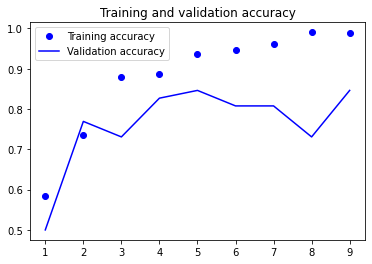

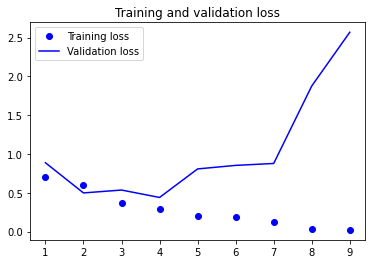

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Despues de ver las graficas con las epocas realizadas, podemos denotar que, , despues de solo unas  "pocas" epocas, podemos observar facilmente el como se realiza un overfitting, la cual se ve cuando se genera una brecha cada vez es mayor  entre el set de entrenamiento y de validacion. Esto se debio esperar, debido por la pequeña cantidad de imagenes en el entrenamiento como tambien en la validacion.

Si probamos la presicion del modelo contra el set de pruebo, los resultados, deberia ser no tan buenos, a como se debe que esperar.

In [14]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") # 0.872

18/18 [==============================] - 28s 806ms/step - loss: 0.5393 - accuracy: 0.8722
Test accuracy: 0.872


sale una presicion alta, lo cual es bueno y malo al mismo tiempo, ya que nos da a conocer que si tiene buna buena presicion,pero debido a poca carga de imagenes que se tiene en los sets,este resultado con el set de prueba es seguro que tiene un overfitting alto , lo cual hay que pelear contra ello y solucionarlo para asi conseguir el resultado de presicion real.

# Data Augmentation

Visto lo anterior, el overfitting  visto se debe a que tiene muy pocas muestras de las que aprender dentro de los set, lo que le impide entrenar un modelo que pueda generalizarse a nuevos datos. Dados datos infinitos, su modelo estaría expuesto a todos los aspectos posibles de la distribución de datos en cuestión: nunca se sobreajustaría. El aumento de datos adopta el enfoque de generar más datos de entrenamiento a partir de muestras de entrenamiento existentes al aumentar las muestras a través de una serie de transformaciones aleatorias que producen imágenes de aspecto creíble. El objetivo es que, en el momento del entrenamiento, su modelo nunca vea exactamente la misma imagen dos veces. Esto ayuda a exponer el modelo a más aspectos de los datos para que pueda generalizarse mejor.

In [15]:
# Para generar un data augmentation de las imagenes que se tiene a la mano,
# lo realizamos de la siguienete manera:
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2)])

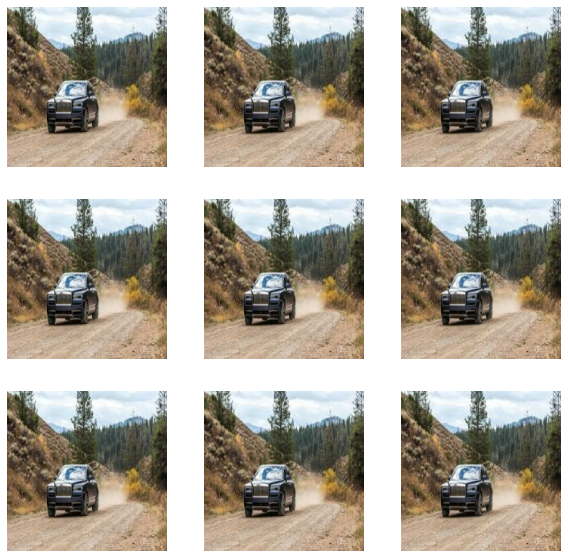

In [16]:
# checamos si realizado el data augmentacion de la siguiente manera con una 
# sola imagen
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

viendo lo anterior podemos ver la imagen usada original, mas su augmentaciones con diferentes angules y tamaños.

ya viendo que funciona, ahora lo podemos agregar a las capas de nuestro model anterior e intentarlo de nuevo el overfitting deberia ser significativamente menor, por lo que podemos entrenar durante un mayor número de épocas.

In [17]:
# creacion del nuevo modelo con data augmentation:
model = keras.Sequential([keras.Input(shape=(224, 224, 3)),
                          layers.Rescaling(1./255),
                          layers.RandomFlip("horizontal"), # Capa1 DA
                          layers.RandomRotation(0.1), # Capa2 DA
                          layers.RandomZoom(0.2),  # Capa3 DA
                          layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.Conv2D(filters=16, kernel_size=(5,5), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=8, kernel_size=(3,3), activation = "relu"),
                          layers.Conv2D(filters=8, kernel_size=(3,3), activation = "relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Flatten(),
                          layers.Dense(units= 120, activation = "relu"),
                          layers.Dropout(0.1),
                          layers.Dense(units= 90, activation = "relu"),
                          layers.Dense(units= 64, activation = "relu"),
                          layers.Dense(1, activation="sigmoid")])

model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 216, 216, 16)      12816     
                                                      

In [19]:
# Copilamos el nuevo modelo
model.compile(loss="binary_crossentropy",
              #optimizer="rmsprop",
              metrics=["accuracy"])

Nuevamente, ya teniendo en modelo compilado, ahora ya esta listo para comenzar a entrenar el modelo con los datos ya preparados, lo cual agregamos la funcion callback para guadar  los mejores pesos del modelo en funcion al valor de perdida de la validacion.

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=40, # variable arbitraria
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/40
41/42 [============================>.] - ETA: 0s - loss: 0.7262 - accuracy: 0.4829

42/42 [==============================] - 9s 145ms/step - loss: 0.7253 - accuracy: 0.4881 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/40
42/42 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4929

42/42 [==============================] - 5s 124ms/step - loss: 0.6941 - accuracy: 0.4929 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/40
42/42 [==============================] - 3s 63ms/step - loss: 0.7664 - accuracy: 0.4952 - val_loss: 0.6927 - val_accuracy: 0.6538
Epoch 4/40
42/42 [==============================] - ETA: 0s - loss: 0.6991 - accuracy: 0.5238

42/42 [==============================] - 5s 122ms/step - loss: 0.6991 - accuracy: 0.5238 - val_loss: 0.6892 - val_accuracy: 0.5385
Epoch 5/40
42/42 [==============================] - 3s 63ms/step - loss: 0.6713 - accuracy: 0.6881 - val_loss: 4.8938 - val_accuracy: 0.3269
Epoch 6/40
42/42 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.7738

42/42 [==============================] - 6s 148ms/step - loss: 0.6141 - accuracy: 0.7738 - val_loss: 0.4393 - val_accuracy: 0.7500
Epoch 7/40
42/42 [==============================] - 3s 63ms/step - loss: 0.3836 - accuracy: 0.8357 - val_loss: 0.4968 - val_accuracy: 0.8269
Epoch 8/40
42/42 [==============================] - 3s 63ms/step - loss: 0.4084 - accuracy: 0.8357 - val_loss: 0.9098 - val_accuracy: 0.7308
Epoch 9/40
42/42 [==============================] - 3s 64ms/step - loss: 0.3221 - accuracy: 0.8738 - val_loss: 0.4817 - val_accuracy: 0.8654
Epoch 10/40
42/42 [==============================] - 3s 64ms/step - loss: 0.3039 - accuracy: 0.8952 - val_loss: 0.5776 - val_accuracy: 0.7692
Epoch 11/40
42/42 [==============================] - 3s 64ms/step - loss: 0.2700 - accuracy: 0.9024 - val_loss: 0.4699 - val_accuracy: 0.8654
Epoch 12/40
42/42 [==============================] - 3s 63ms/step - loss: 0.2206 - accuracy: 0.9143 - val_loss: 0.7006 - val_accuracy: 0.8654
Epoch 13/40
42/42 [=

42/42 [==============================] - 5s 121ms/step - loss: 0.1585 - accuracy: 0.9524 - val_loss: 0.3888 - val_accuracy: 0.9038
Epoch 28/40
42/42 [==============================] - 3s 63ms/step - loss: 0.1432 - accuracy: 0.9476 - val_loss: 0.4831 - val_accuracy: 0.8269
Epoch 29/40
42/42 [==============================] - 3s 63ms/step - loss: 0.1410 - accuracy: 0.9452 - val_loss: 0.4712 - val_accuracy: 0.8462
Epoch 30/40
42/42 [==============================] - 3s 63ms/step - loss: 0.1407 - accuracy: 0.9667 - val_loss: 0.4907 - val_accuracy: 0.8654
Epoch 31/40
42/42 [==============================] - ETA: 0s - loss: 0.1274 - accuracy: 0.9500

42/42 [==============================] - 5s 128ms/step - loss: 0.1274 - accuracy: 0.9500 - val_loss: 0.3605 - val_accuracy: 0.8654
Epoch 32/40
42/42 [==============================] - 3s 64ms/step - loss: 0.1502 - accuracy: 0.9524 - val_loss: 0.5452 - val_accuracy: 0.8846
Epoch 33/40
42/42 [==============================] - 3s 61ms/step - loss: 0.1416 - accuracy: 0.9571 - val_loss: 0.6613 - val_accuracy: 0.9038
Epoch 34/40
42/42 [==============================] - 3s 68ms/step - loss: 0.1518 - accuracy: 0.9619 - val_loss: 0.3724 - val_accuracy: 0.8269
Epoch 35/40
42/42 [==============================] - 3s 62ms/step - loss: 0.1035 - accuracy: 0.9667 - val_loss: 0.4176 - val_accuracy: 0.8462
Epoch 36/40
42/42 [==============================] - 3s 62ms/step - loss: 0.0973 - accuracy: 0.9667 - val_loss: 0.6012 - val_accuracy: 0.8654
Epoch 37/40
42/42 [==============================] - 3s 64ms/step - loss: 0.1176 - accuracy: 0.9619 - val_loss: 0.5522 - val_accuracy: 0.8846
Epoch 38/40
42/42

## Revision del entrenamiento con data augmentation:

Ya una vez realizado lo anterior, nos toca revisar el como se comporto el modelo generado por medio de la siguiente grafica:

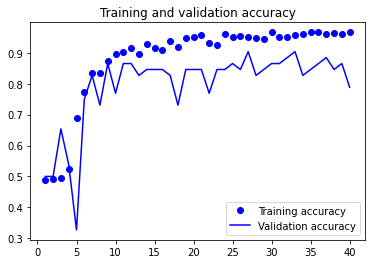

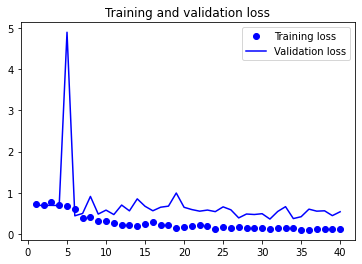

In [21]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Tomando en cuenta los resultados anteriores (las graficas sin data augmentation), estas muestra mejores resultado por las nuevas imagenes agregadas por data augmentation, un nuevo cambio y agregado de capas al modelo original, como tambien  el aumentos de epocas realizadas en el mismo, dando como resultado  un mejor comportamiento del modelo al momento de entrenarlo y dar una mejor validacion a como se presenta con anterioridad.


Finalmente, probamos la presicion del modelo contra el set de prueba, los resultados, deberia ser mejores que el anterior, a como se debe que esperar.

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") # resultado: 0.939 # es mucho mejor que el anterior.

18/18 [==============================] - 1s 23ms/step - loss: 0.4520 - accuracy: 0.9389
Test accuracy: 0.939


Nota: despues de generar la evualacion se realizara  (para la siguiente entrega) pruebas de prediccion y al final, recomendacion para mejorar el modelo aun mas deacuerdo a los resultados dados por dichas predicciones